<a href="https://colab.research.google.com/github/euan-nr/TTC-Incident-Reporting/blob/main/TTC_Delays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [157]:
#Pull Delay Codes
codes_sub=gc.open_by_url("https://docs.google.com/spreadsheets/d/1h5eQZ2vosuBK7w4nUGVBtkdeU7jaPqtRyk6CbUp1oxs/edit#gid=1925460578").sheet1
values = codes_sub.get_all_values()
codes_sub = pd.DataFrame(values[1:],columns=values[0])
codes_srt=gc.open_by_url("https://docs.google.com/spreadsheets/d/12VERUjC0vH_IXXMjwPE5i3aPZjOXhONBvZtpvvRxXxU/edit#gid=2004182443").sheet1
values = codes_srt.get_all_values()
codes_srt = pd.DataFrame(values[1:],columns=values[0])

In [158]:
ttc2018 = gc.open_by_url('https://docs.google.com/spreadsheets/d/10TuyNMtIPxV-f6ipie52ZSH_S0Q3u-vbZcowTvbjriw/edit#gid=608361424')
ttc2019 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1niNiXHoWzEnJQ6FMxWcqybMUy9SLwn5p9exX6XM3EbI/edit#gid=1588468639')
ttc2020 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1HU5Ydhddg9FbFIWOgd7rbd_ybWfE2mWjYF5H8NesVGM/edit#gid=709672757')
ttc2021 = gc.open_by_url('https://docs.google.com/spreadsheets/d/15VCs-DbYX5LRy3Pdq_XOZViqpHXFum5wwwNtOxPT05I/edit#gid=608057869')
ttc2022 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1cmAnAFmol51KvdVYvXWElBKGwpU8fUZtBIvTJxx5rmU/edit#gid=1839550723')
ttc2023 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1aa2Is_pqP6hcDYZUZPenhS8wSVV17RjAa6hzlALHbJ4/edit#gid=1800918964')
listChange = [ttc2018,ttc2019,ttc2020,ttc2021,ttc2022,ttc2023]

In [230]:
#Create combined DataFrame for all incidents 2018-2023
listFrames=[]
for wb in listChange:
  for sheets in wb.worksheets():
    rows = sheets.get_all_values()
    df=pd.DataFrame.from_records(rows[1:],columns=rows[0])
    listFrames.append(df)
df=pd.concat(listFrames,ignore_index=True)

In [ ]:
#Use 2022 Data only - TEST BLOCK
ttc2022 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1cmAnAFmol51KvdVYvXWElBKGwpU8fUZtBIvTJxx5rmU/edit#gid=1839550723').sheet1
values=ttc2022.get_all_values()
df=pd.DataFrame(values[1:],columns=values[0])

In [231]:
df['Datetime']=pd.to_datetime(df['Date']+' '+df['Time'])
cols = df.columns.tolist()  # Get the list of column names
cols = ['Datetime'] + cols[:-1]  # Move 'Datetime' to the first position
df = df[cols]  # Reorder the columns in the DataFrame
df['Day']=df['Day'].astype(str)
df['Station']=df['Station'].astype(str)
df['Code']=df['Code'].astype(str)
df['Min Delay']=df['Min Delay'].astype(int)
df['Min Gap']=df['Min Gap'].astype(int)
df['Bound']=df['Bound'].astype(str)
df['Line']=df['Line'].astype(str)
df['Vehicle']=df['Vehicle'].astype(str)

In [232]:
#Filter for all incidents which caused a delay
df=df.drop(['Date','Time'],axis=1)
df=df[df['Min Delay']>0]
df_test=df

In [ ]:
df.dtypes

In [256]:
df_test

,Datetime,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
1,2018-01-06 13:40:00,Saturday,BATHURST STATION,EUDO,3,7,W,BD,5259
7,2018-01-19 15:04:00,Friday,BATHURST STATION,EUAL,3,6,E,BD,5336
8,2018-01-23 00:57:00,Tuesday,BATHURST STATION,MUIR,6,10,E,BD,5085
19,2018-01-03 09:36:00,Wednesday,BAY STATION,MUIR,5,8,W,BD,5238
20,2018-01-03 23:24:00,Wednesday,BAY STATION,SUDP,3,5,W,BD,5011
...,...,...,...,...,...,...,...,...,...
100530,2023-05-31 16:34:00,Wednesday,WELLESLEY STATION,MUSAN,3,6,S,YU,5396
100533,2023-05-31 17:13:00,Wednesday,YONGE STATION,EUDO,6,9,E,BD,5359
100534,2023-05-31 17:28:00,Wednesday,ST CLAIR STATION,MUPAA,3,6,N,YU,5806
100537,2023-05-31 18:15:00,Wednesday,VAUGHAN MC STATION,MUATC,3,6,S,YU,5651


In [203]:
#Check all years are recorded
year_list=df["Datetime"].dt.year.unique()
year_list

array([2018, 2019, 2020, 2021, 2022, 2023])

In [225]:
#UNFILTERED STATIONS do not run
station_list2=df_test["Station"].unique().tolist()
station_counts2=df_test['Station'].value_counts().sort_index()
for station2, count2 in station_counts2.items():
    print(station2, count2)

ALLEN RD (N OF EGLINTO 1
ATC AREA 1
ATC FAILURE 1
ATC TERRITORY 1
BATHURST STATION 303
BATHUSRT STATION 1
BAY LOWER STATION 1
BAY STATION 275
BAYVIEW STATION 182
BESSARIAN STATION 1
BESSARION STATION 139
BLOOR DANFORTH LINE 5
BLOOR DANFORTH SUBWAY 9
BLOOR SATION 1
BLOOR STATION 967
BLOOR TO COLLEGE 1
BLOOR TO DAVISVILLE ST 1
BLOOR TO MUSUEM STATIO 1
BLOOR TO ST.CLAIR 1
BLOOR TO UNION 1
BLOOR VIA DUCT 1
BLOOR VIADUCT 3
BLOOR-DANFORTH LINE 1
BLOOR/DANFORTH LINE 1
BLOOR/YONGE 1
BROADVIEW STATION 421
BROADVIEW TO KIPLING S 1
BROADVIEW TO YONGE 2
CASTLE FRANK STATION 302
CHESTER CENTRE TRACK 1
CHESTER STATION 270
CHESTER TO WARDEN 1
CHESTER TO YONGE STATI 1
CHRISTIE STATION 317
CHURCH EMERGENCY EXIT 1
COLLEGE STATION 430
COLLEGE TO KING 1
COXWELL STATION 963
COXWELL TO KENNEDY STA 1
DAVISVILLE BUID-UP 1
DAVISVILLE BUILD UP 17
DAVISVILLE BUILD-UP 7
DAVISVILLE BUILDD UP 1
DAVISVILLE BUILDUP 6
DAVISVILLE HOSTLER 4
DAVISVILLE STATION 817
DAVISVILLE YARD 21
DON MILLS STATION 342
DONLANDS STATION

In [237]:
#Cleaning Station Names
#Fix spelling errors in Station column
df['Station'] = df['Station'].str.replace(r'\s*STATION.*', ' STATION', regex=True) #Remove words after STATION
df['Station'] = df['Station'].str.replace("ST\.", "ST", regex=True) #Replace ST. with ST
df['Station'] = df['Station'].replace({
    'BATHUSRT STATION': 'BATHURST STATION',
    'BESSARIAN STATION': 'BESSARION STATION',
    'SATION': 'STATION',
    'BUID-UP':'BUILD-UP',
    'BUILD UP':'BUILD-UP',
    'BUILDD-UP':'BUILD-UP',
    'BUIDUP':'BUILD-UP',
    'DOWNVIEW PARK STATION':'DOWNSVIEW PARK STATION',
    'STAT' : 'STATION',
    'STATIO':'STATION',
    ' STATION' : 'STATION',
    'SHEPPARD YONGE STATION':'SHEPPARD-YONGE STATION',
    'SHEPPARD- YONGE STATION':'SHEPPARD-YONGE STATION',
    'YONGE SHEP STATION': 'SHEPPARD-YONGE STATION',
    'YONGE SHP STATION': 'SHEPPARD-YONGE STATION',
    'GLENCARIN STATION':'GLENCAIRN STATION',
    'VMC STATION' : 'VAUGHAN MC STATION',
    'FICNH STATION' : 'FINCH STATION',
    'LAWERENCE STATION':'LAWRENCE STATION',
    'MC COWAN STATION' : 'MCCOWAN STATION',
    'BLOOR STATION' : 'BLOOR-YONGE STATION',
    'YONGE STATION' : 'BLOOR-YONGE STATION',
    'SHEPHARD WEST STATION' : 'SHEPPARD WEST STATION',
    'SHEPPHARD WEST STATION' : 'SHEPPARD WEST STATION',
    'BAY LOWER STATION':'BAY STATION',
    'EGLINTON PSUDO STATION':'EGLINTON STATION',
    'KENNEDY SRT STATION':'KENNEDY STATION',
    'PIONEER VILLAGE STATIO': 'PIONEER VILLAGE STATION',
    'SPADINA  STATION':'SPADINA STATION',
    'EGLINGTON STATION':'EGLINTON STATION',
    'YORK UNIVERSITY STATIO':'YORK UNIVERSITY STATION',
    'SCARBOROUGH CTR STATIO':'SCARBOROUGH CENTRAL STATION',
    'SCARB CTR STATION':'SCARBOROUGH CENTRAL STATION',
    'SCARBOROUGH CENTRE STA':'SCARBOROUGH CENTRAL STATION',
    'YONGE  STATION':'BLOOR-YONGE STATION'
})
df['Station'] = df['Station'].str.replace("QUEENS", "QUEEN'S", regex=False) #Correct naming of Queen's Park
df['Station'] = df['Station'].str.replace(r"\b\w+\sTO\s(.+?\s)?STATION\b", "STATION", regex=True) #Removing "TO X" before station
df['Station'] = df['Station'].str.replace(r"\b(YU|BD|YUS)\b", "", regex=True) #Remove the line codes - redundant
df['Station'] = df['Station'].str.replace('SHEPPARD STATION','SHEPPARD-YONGE STATION')

In [238]:
#Filter for all incidents which occured at a station
df=df[df['Station'].str.contains('STATION',case=False)]
df=df.drop(df[df['Station']=='STATION'].index)

In [ ]:
station_list=df["Station"].unique().tolist()
station_counts=df['Station'].value_counts().sort_index()
for station, count in station_counts.items():
    print(station, count)

In [ ]:
print('Number of Stations:',len(station_list))

In [ ]:
#Checking Codes
code_list=df["Code"].unique().tolist()
code_counts=df['Code'].value_counts().sort_index()
for code, count in code_counts.items():
    print(code, count)

In [ ]:
print("Number of Codes:",len(code_list))

In [ ]:
sort_station=station_counts.sort_values(ascending=False).head(10) #sort top 10 delay times
df_stationcounts = pd.DataFrame({'Station': sort_station.index, 'Count': sort_station.values})
df_stationcounts

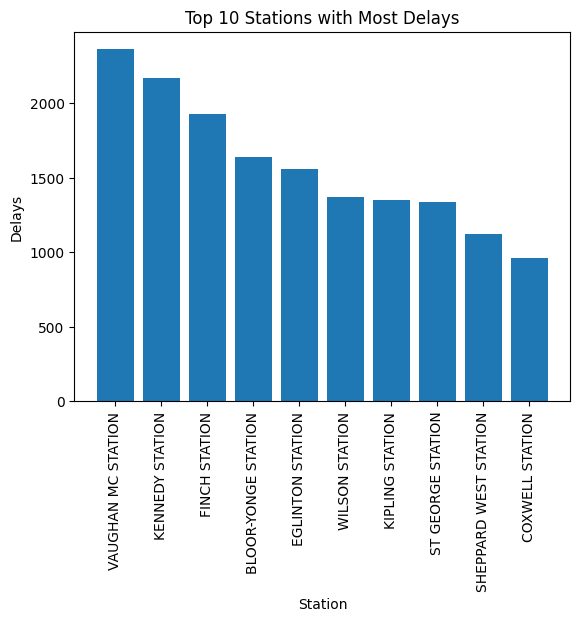

In [275]:
plt.bar(df_stationcounts['Station'], df_stationcounts['Count'])
plt.xlabel('Station')
plt.ylabel('Delays')
plt.title('Top 10 Stations with Most Delays')
plt.xticks(rotation=90)
plt.show()

In [277]:
station_delay_sum = df.groupby('Station')['Min Delay'].sum().reset_index()
station_delay_sum=station_delay_sum.rename(columns={'Min Delay':'Total Min Delay'})
station_delay_sum=station_delay_sum.sort_values(by='Total Min Delay',ascending=False).head(75)
print(station_delay_sum)

                    Station  Total Min Delay
31          KENNEDY STATION            15641
4       BLOOR-YONGE STATION            12675
66       VAUGHAN MC STATION            10541
62        ST GEORGE STATION             9760
19         EGLINTON STATION             9465
..                      ...              ...
38           LESLIE STATION             1514
48  PIONEER VILLAGE STATION             1416
14   DOWNSVIEW PARK STATION             1372
3         BESSARION STATION             1033
73  YORK UNIVERSITY STATION              903

[75 rows x 2 columns]
